Here's some example code to play with from Basic Aerodynamics class.

To execute a selected cell you can use Shift+Enter.

In [22]:
#Here we import some libraries
#To make sure you have all of them ins
import numpy as np
import string
import matplotlib.pyplot as plt
%matplotlib inline

(-0.0499748, 1.0499988, -0.020462399999999999, 0.10855440000000001)

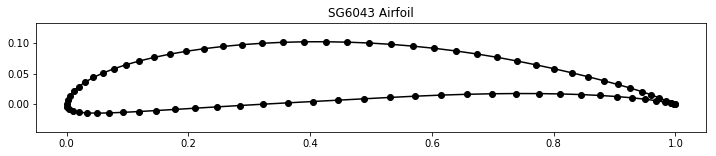

In [23]:
# Here we have an example of how to read the data file of an airfoil SG6043.dat and then plot the datapoints

SG6043 = np.loadtxt('SG6043.dat',skiprows=1)
plt.figure(figsize=(12,2))
plt.title('SG6043 Airfoil')
plt.plot(SG6043[:,0],SG6043[:,1], '-ok')
plt.axis('equal')

In [24]:
# Here are some examples of how to do calculations in Python

b = 3.5              # [m] wing span (excl body)
c0 = 50e-2           # [m] Chord length at body
S = np.pi *b/2 *c0/2 # [m2] Area
AR = b**2/S          # Aspect Ratio
alpha_L0 = -4.5*np.pi/180 # [rad] zero-lift angle (sg6043-il)
L = 200              # [N] Needed lift force
T = 100        # [N] Thrust needeed, weight per motor
rho = 1.269    # [kg/m3] Air at 5°C


print('Aspect Ratio: ',AR)



('Aspect Ratio: ', 8.91267681314614)


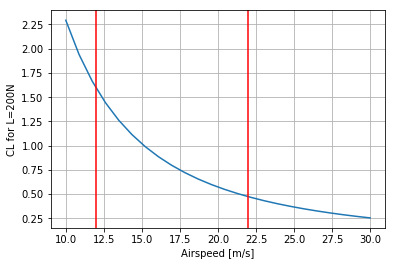

In [25]:
# Here we have the coefficient of lift of a certain aircraft over speed. Plus two vertical lines to 
#show requirement boundaries

Q = np.linspace(10,30,24)
CL_Q = L/(0.5*rho*Q**2*S)
plt.figure()
plt.plot(Q,CL_Q)
plt.axvline(x=12,color='r')
plt.axvline(x=22,color='r')
plt.xlabel('Airspeed [m/s]')
plt.ylabel('CL for L=200N')
plt.grid()

In [26]:
# Here is an example how to automate plotting a graph and put multiple axis scales on y-axis
#The plots are automatically saved as png files

def XFoilPlot(name, speed):    
    #Get values
    filename = name + "_" + speed + "_ipynb.log"
    f = open(filename, 'r')
    flines = f.readlines()
    Lmax = 0
    objectiveValues = []
    alpha = []
    CL = []
    CD = []
    CM = []

    for i in range(12, len(flines)):
        # print flines[i]
        words = string.split(flines[i])
        alpha.append(float(words[0]))
        CL.append(float(words[1]))
        CD.append(float(words[2]))
        CM.append(float(words[4]))

    CLD=[]
    listl = len(CL)
    for i in range(0,listl):
        CLD.append(float(CL[i])/float(CD[i]))

    
    fig, ax1 = plt.subplots()
    #ax1.plot(alpha, CD, 'b-')
    ax1.set_xlabel('Angle of Attack',fontsize=14)
    # Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel('$C_l$', color='b',fontsize=14)
    ax1.tick_params('y', colors='b')
    #ax1 = ax1.twinx()
    ax1.plot(alpha, CL, 'b-')
    
    ax2 = ax1.twinx()
    ax2.plot(alpha, CLD, 'r-')
    ax2.set_ylabel('$C_l/C_d$', color='r',fontsize=14)
    ax2.tick_params('y', colors='r')
    
    ax1.set_ylim([-0.2, 1.8])
    ax2.set_ylim([-10,110])
    ax1.set_yticks(np.linspace(ax1.get_ybound()[0], ax1.get_ybound()[1], 5))
    ax2.set_yticks(np.linspace(ax2.get_ybound()[0], ax2.get_ybound()[1], 5))
    ax1.grid()

    fig.tight_layout()
    plt.savefig(name + '_' + speed + '_poster_ClCdCl', format='pdf')
    plt.show()
    
    



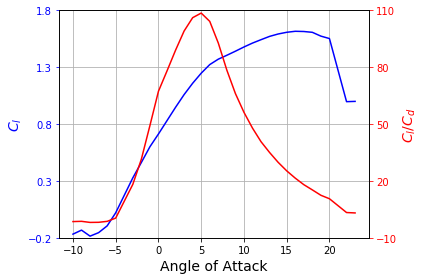

In [27]:
# and here we use the function created in the cell before
XFoilPlot("SG6043", "12ms")

In [28]:
#Here we have a function that automates an entire series of different plots
#The plots are automatically saved as png files

def XFoilPlot(name, speed):    
    #Get values
    filename = name + "_" + speed + "_ipynb.log"
    f = open(filename, 'r')
    flines = f.readlines()
    Lmax = 0
    objectiveValues = []
    alpha = []
    CL = []
    CD = []
    CM = []

    for i in range(12, len(flines)):
        # print flines[i]
        words = string.split(flines[i])
        alpha.append(float(words[0]))
        CL.append(float(words[1]))
        CD.append(float(words[2]))
        CM.append(float(words[4]))

    CLD=[]
    listl = len(CL)
    for i in range(0,listl):
        CLD.append(float(CL[i])/float(CD[i]))

    #CD vs CL
    plt.figure()
    plt.plot(CD,CL)
    plt.xlabel('$C_d$',fontsize=14)
    plt.ylabel('$C_l$',fontsize=14)
    plt.tight_layout()
    plt.grid()
    #plt.title('at ' + speed)
    plt.tight_layout()
    plt.savefig(name + '_' + speed + '_CDCL')
    


    # alpha vs CL 
    plt.figure()
    plt.plot(alpha, CL)
    plt.xlabel('AOA [deg]',fontsize=14)
    plt.ylabel('$C_l$',fontsize=14)
    plt.grid()
    #plt.title('at ' + speed)
    plt.tight_layout()
    plt.savefig(name + '_' + speed + '_AoACL')
    


    # alpha vs CL/CD
    plt.figure()
    plt.plot(alpha, CLD)
    plt.xlabel('AOA [deg]',fontsize=14)
    plt.ylabel('$C_l$/$C_d$',fontsize=14)
    plt.grid()
    #plt.title('at ' + speed)
    plt.tight_layout()
    plt.savefig(name + '_' + speed + '_AoACLD')
    
    # alpha vs CD
    plt.figure()
    plt.plot(alpha, CD)
    plt.xlabel('AOA [deg]',fontsize=14)
    plt.ylabel('$C_d$',fontsize=14)
    plt.grid()
    #plt.title('at ' + speed)
    plt.tight_layout()
    plt.savefig(name + '_' + speed + '_AoACD')
    


    # alpha vs CM
    plt.figure()
    plt.plot(alpha, CM)
    plt.xlabel('AOA [deg]',fontsize=14)
    plt.ylabel('$C_m$',fontsize=14)
    plt.grid()
    #plt.title('at ' + speed)
    plt.tight_layout()
    plt.savefig(name + '_' + speed + '_AoACM')
    


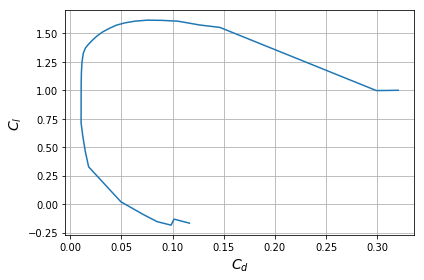

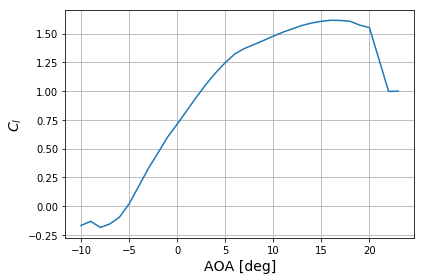

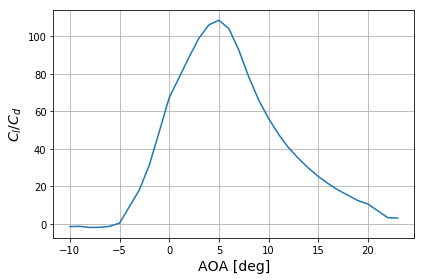

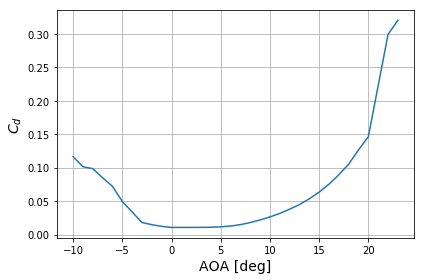

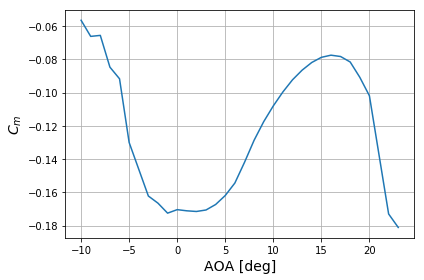

In [29]:
#and here we execute that series
XFoilPlot("SG6043", "12ms")